<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/titanic_dp_20210302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle

In [2]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.35MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 22.6MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 60.6MB/s]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train_df=pd.read_csv('train.csv')
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

sex_dummies=pd.get_dummies(train_df['Sex'],prefix='Sex')
embarked_dummies=pd.get_dummies(train_df['Embarked'],prefix='Embarked')


train_df=pd.concat([train_df,sex_dummies,embarked_dummies],axis=1)
train_df=train_df.drop(['PassengerId',
                        'Name',
                        'Ticket',
                        'Cabin',
                        'Sex',
                        'Embarked',
                        'Sex_female',
                        'Embarked_C',
                        ],
                       axis=1)

train_df['Fare']=np.log(train_df['Fare']+1)
train_df['Age']=np.log(train_df['Age']+1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [ ]:
train_df.describe()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,3.291723,0.523008,0.381594,2.962246,0.647587,0.086420,0.725028,0.206510,0.551066
std,0.486592,0.615804,1.102743,0.806057,0.969048,0.477990,0.281141,0.446751,0.405028,0.497665
min,0.000000,0.350657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.135494,0.000000,0.000000,2.187218,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.424234,0.000000,0.000000,2.737881,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.583519,1.000000,0.000000,3.465736,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,4.394449,8.000000,6.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000


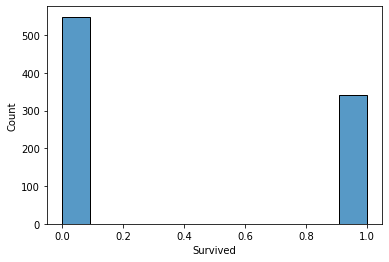

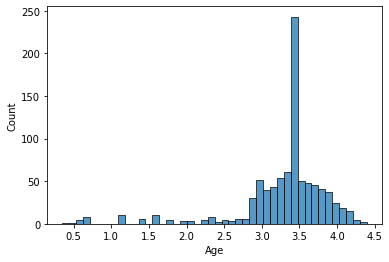

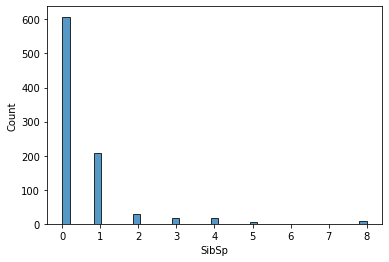

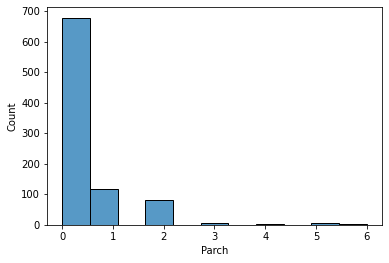

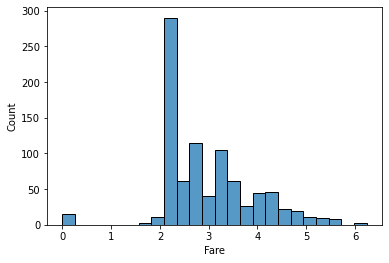

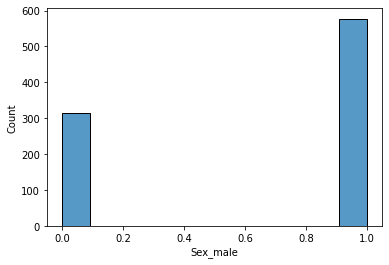

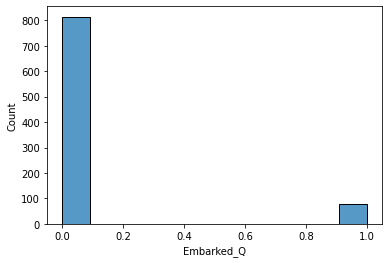

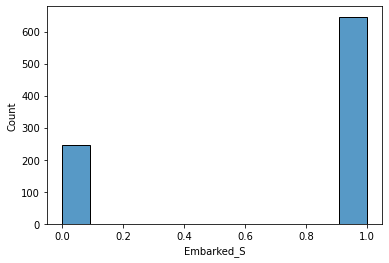

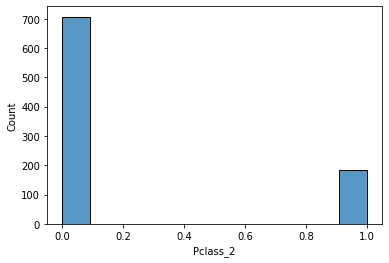

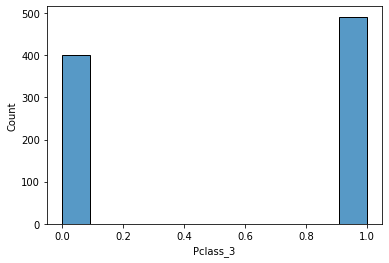

In [ ]:
for col in train_df:
  plt.figure()
  sns.histplot(train_df[col])

In [ ]:
def calc_vif(input_df):
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  vif=pd.DataFrame()
  vif['VIF Factor']=[variance_inflation_factor(input_df.values,i) for i in range(input_df.shape[1])]
  vif['features']=input_df.columns

  print(vif)

In [ ]:
calc_vif(train_df)

   VIF Factor    features
0    2.479779    Survived
1   21.477799         Age
2    1.847145       SibSp
3    1.784979       Parch
4   17.371404        Fare
5    3.937997    Sex_male
6    1.622909  Embarked_Q
7    5.231121  Embarked_S
8    2.025133    Pclass_2
9    4.259561    Pclass_3


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_df.keys()

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

In [ ]:
numerical_columns=['Age','Fare']
categorical_columns=['Sex_male','Embarked_Q','Embarked_S','Pclass_2','Pclass_3']


In [ ]:
from sklearn.preprocessing import StandardScaler
X_df=train_df.drop(['Survived'],axis=1)
y_df=train_df['Survived']
scaler=StandardScaler()
X_df=pd.DataFrame(scaler.fit_transform(X_df),columns=X_df.columns)

In [ ]:
X_df

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-0.253842,0.432793,-0.473674,-0.879741,0.737695,-0.307562,0.615838,-0.510152,0.902587
1,0.604165,0.432793,-0.473674,1.361220,-1.355574,-0.307562,-1.623803,-0.510152,-1.107926
2,0.006684,-0.474545,-0.473674,-0.798540,-1.355574,-0.307562,0.615838,-0.510152,0.902587
3,0.474111,0.432793,-0.473674,1.062038,-1.355574,-0.307562,0.615838,-0.510152,-1.107926
4,0.474111,-0.474545,-0.473674,-0.784179,0.737695,-0.307562,0.615838,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...
886,0.065774,-0.474545,-0.473674,-0.333698,0.737695,-0.307562,0.615838,1.960202,-1.107926
887,-0.480928,-0.474545,-0.473674,0.487082,-1.355574,-0.307562,0.615838,-0.510152,-1.107926
888,0.215304,0.432793,2.008933,0.242007,-1.355574,-0.307562,0.615838,-0.510152,0.902587
889,0.006684,-0.474545,-0.473674,0.487082,0.737695,-0.307562,-1.623803,-0.510152,-1.107926


NameError: ignored